In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
train=pd.read_csv('train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

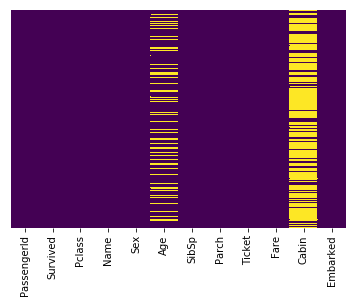

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
train['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [9]:
sns.set_style('whitegrid')

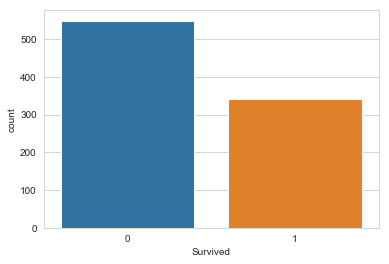

In [10]:
sns.countplot(x='Survived', data=train)

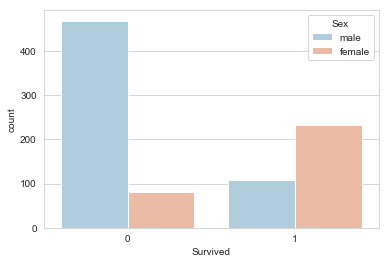

In [11]:
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

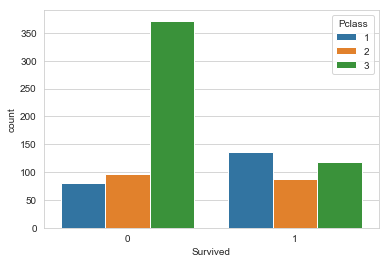

In [12]:
sns.countplot(x='Survived', hue='Pclass', data=train)

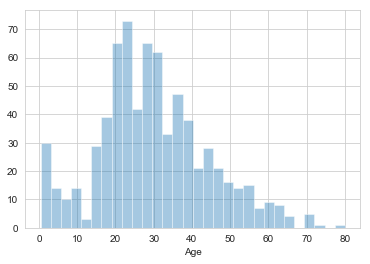

In [13]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

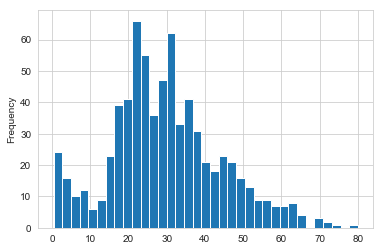

In [14]:
train['Age'].plot.hist(bins=35)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


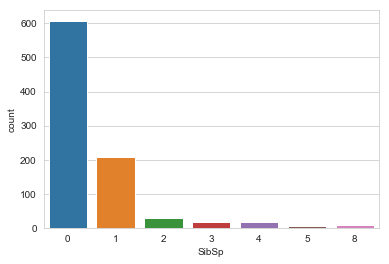

In [16]:
sns.countplot(x='SibSp', data=train)

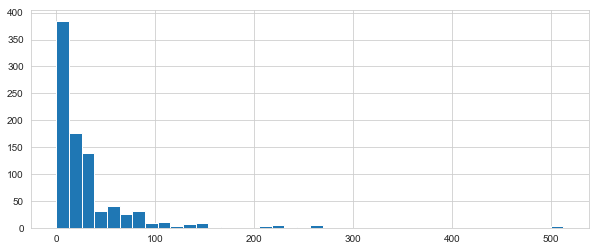

In [17]:
train['Fare'].hist(bins=40, figsize=(10,4))

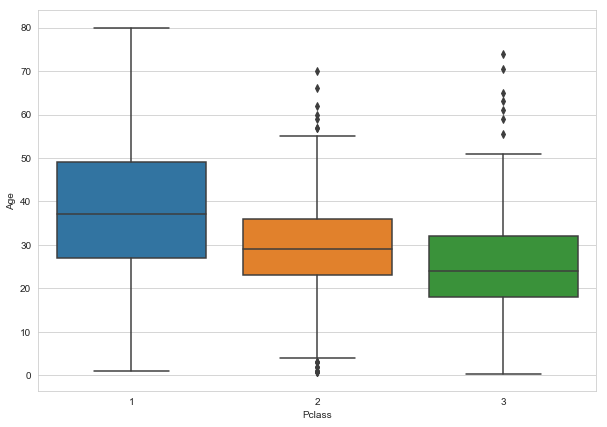

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train) #older passengers are more wealthier to buy 1st class tickets

###### Imputation.. taking Mean to adjust null values

In [20]:
def impute(features):
    age=features[0] #first of the two columns i.e. age column
    pclass=features[1] #second of the two columns i.e. pclass column
    
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else: 
            return 24
    else:
        return age

In [21]:
train['Age']=train[['Age','Pclass']].apply(impute, axis=1)

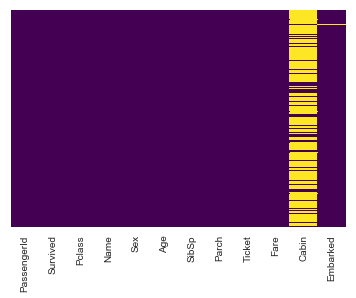

In [22]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
train['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

In [24]:
train['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

###### Cabin column has too many missing values, cannot be imputed. Hence, whole column needs to be dropped.

In [25]:
train.drop('Cabin', axis=1, inplace=True)

In [26]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


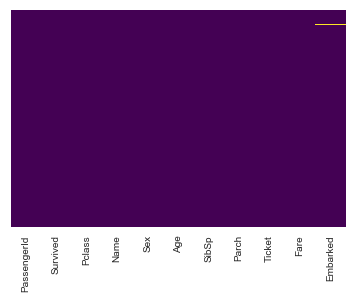

In [27]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

##### only embarked has two null values left

In [28]:
train['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [29]:
train.dropna(inplace=True)

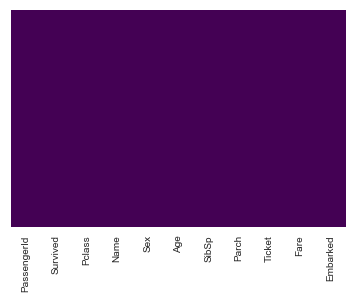

In [30]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

##### cleaned heatmap

### Creating dummy variables for ML of categorical columns

In [31]:
sex=pd.get_dummies(train['Sex'], drop_first=True, prefix='Sex') #drop one column otherwise ML algo will mess up, it will understand that one column is perfect predictor of the other

embark=pd.get_dummies(train['Embarked'], drop_first=True, prefix='Embark')

pclass=pd.get_dummies(train['Pclass'], drop_first=True, prefix='Pclass')

parch=pd.get_dummies(train['Parch'], drop_first=True, prefix='Parch')

sibsp=pd.get_dummies(train['SibSp'], drop_first=True, prefix='SibSp')

In [32]:
train_data=pd.concat([train, sex, embark, pclass,parch, sibsp], axis=1, join='inner')

In [33]:
train_data.drop(['Name','Pclass', 'Sex','SibSp','Parch','Ticket','Embarked'], axis=1, inplace=True)

In [34]:
train_data.head(3)

,PassengerId,Survived,Age,Fare,Sex_male,Embark_Q,Embark_S,Pclass_2,Pclass_3,Parch_1,...,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,1,0,22.0,7.2500,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,38.0,71.2833,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1,26.0,7.9250,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#train_data.to_csv(r'my_train_data.csv', index=False)

### Logistic Regression

In [36]:
X=train_data.drop(['PassengerId','Survived'], axis=1)

In [37]:
y=train_data['Survived']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel=LogisticRegression()

In [42]:
X['Parch_1'].isnull().value_counts()

False    889
Name: Parch_1, dtype: int64

In [43]:
logmodel.fit(X_train, y_train)

C:\Users\MURK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_pred=logmodel.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.64      0.72       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
print(confusion_matrix(y_test, y_pred))

[[148  15]
 [ 37  67]]


### TESTING FINAL MODEL

In [49]:
test_data=pd.read_csv('test.csv')

In [50]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


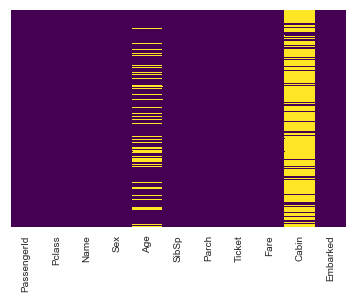

In [51]:
sns.heatmap(test_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

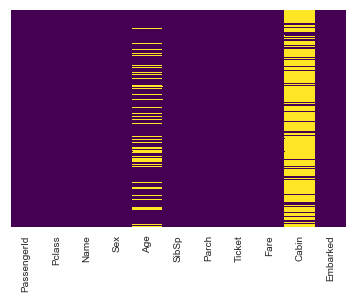

In [52]:
sns.heatmap(test_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

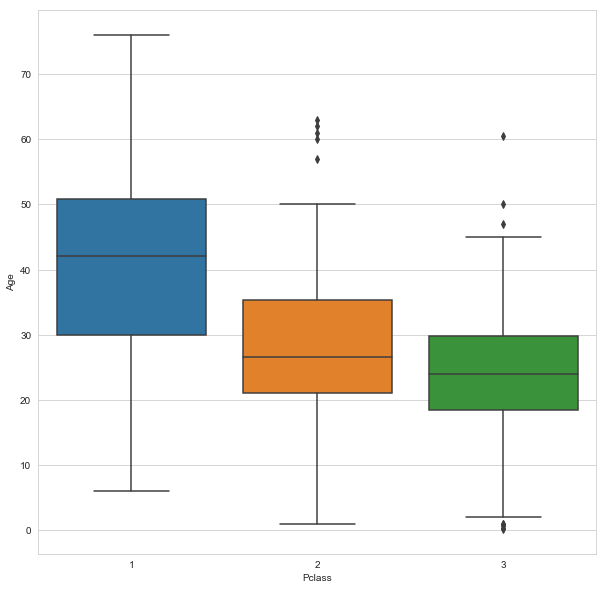

In [53]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age', data=test_data)

In [55]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [56]:
def impute2(features):
    age=features[0] #first of the two columns i.e. age column
    pclass=features[1] #second of the two columns i.e. pclass column
    
    if pd.isnull(age):
        if pclass==1:
            return 42
        elif pclass==2:
            return 27
        else: 
            return 24
    else:
        return age

In [57]:
test_data['Age']=test_data[['Age','Pclass']].apply(impute2, axis=1)

In [58]:
test_data['Age'].isnull().value_counts()

False    418
Name: Age, dtype: int64

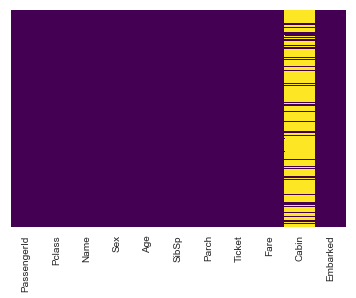

In [61]:
sns.heatmap(test_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [62]:
test_data['Fare'].median()

14.4542

In [63]:
test_data['Fare'].isnull().value_counts()

False    417
True       1
Name: Fare, dtype: int64

In [64]:
test_data.fillna(value=15,inplace=True)

In [65]:
tsex=pd.get_dummies(test_data['Sex'], drop_first=True, prefix='Sex') #drop one column otherwise ML algo will mess up, it will understand that one column is perfect predictor of the other

tembark=pd.get_dummies(test_data['Embarked'], drop_first=True, prefix='Embark')

tpclass=pd.get_dummies(test_data['Pclass'], drop_first=True, prefix='Pclass')

tparch=pd.get_dummies(test_data['Parch'], drop_first=True, prefix='Parch')

tsibsp=pd.get_dummies(test_data['SibSp'], drop_first=True, prefix='SibSp')

In [66]:
test_data=pd.concat([test_data, tsex, tembark, tpclass, tparch, tsibsp], axis=1, join='inner')

In [67]:
test_data.drop(['Name','SibSp','Cabin','Ticket','Pclass','Sex','Embarked', 'Parch'], axis=1, inplace=True)

In [68]:
logmodel2=LogisticRegression()

In [69]:
X_tr=train_data.drop(['PassengerId','Survived'], axis=1)

In [70]:
y_tr=train_data['Survived']

In [71]:
logmodel2.fit(X_tr,y_tr)

C:\Users\MURK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
X_ts=test_data.drop('PassengerId', axis=1)

In [73]:
X_ts.head()

,Age,Fare,Sex_male,Embark_Q,Embark_S,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,34.5,7.8292,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47.0,7.0000,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,62.0,9.6875,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,27.0,8.6625,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,22.0,12.2875,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0


In [74]:
X_tr.columns

Index(['Age', 'Fare', 'Sex_male', 'Embark_Q', 'Embark_S', 'Pclass_2',
       'Pclass_3', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8'],
      dtype='object')

In [75]:
X_ts['Parch_9'].value_counts()

0    416
1      2
Name: Parch_9, dtype: int64

In [76]:
X_ts.drop('Parch_9', axis=1, inplace=True) #not much important

In [77]:
mypredictions=logmodel2.predict(X_ts)

In [78]:
df_pred=pd.DataFrame(mypredictions,columns=['Survived'])

In [79]:
df_pred.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [80]:
mysubmission=test_data['PassengerId']

In [81]:
mysubmission=pd.concat([mysubmission,df_pred], axis=1, join='inner')

In [82]:
mysubmission.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [ ]:
#mysubmission.to_csv(r'my_new_submission3.csv', index=False)

In [ ]:
#test_data.to_csv(r'my_test_data.csv', index=False)

#### accuracy achieved=0.77033